<h1 align=center><font size = 5>AI SATURDAY LAGOS COHORT 8</font></h1>   

<h1 align=center><font size = 5>TEAM JOHNSON-SIRLEAF </font></h1>  
<h2 align=center><font size = 6>MACHINE LEARNING APPROACH TO
PREDICTING DIABETES RISKS</font></h2>

<h5 align=center><font size = 2>Data Source: <a href="https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset" target="_blank">Kaggle.<a/></font></h5>

## DATA PREPARATION

### Importing Libraries

In [1]:
import numpy as np                      # for mahematical operations
import pandas as pd                     # for data manipulation and cleaning
import seaborn as sns                   # for data visulization
import plotly.express as px             # for data visulization
import matplotlib.pyplot as plt         # for data visulization

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

### Loading Data

In [2]:
# Read in dataset
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')

In [3]:
df.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


### Data Dictionary

| variable       | class     | description                                                                  |
|:---------------|:----------|:-----------------------------------------------------------------------------|
| Gender               | character | Biological sex of the individual  |
| Age                  | numeric   | Age of the individual  |
| Hypertension         | numeric   | 0 = No Hypertension / 1 = Has Hypertension|
| Heart_disease        | numeric   | 0 = No Heart disease / 1 = Has Heart disease|
| Smoking_history      | character | 5 categories i.e not current,former,No Info,current,never and ever |
| bmi                  | numeric   | Body Mass Index, a measure of body fat based on weight and height|
| HbA1c_level          | numeric   | Hemoglobin A1c, a measure of a person's average blood sugar level over the past 2-3 months|
| Blood_glucose_level  | numeric | Amount of glucose in the bloodstream at a given time|
| Diabetes             | numeric | 0 indicates absence of diabetes, 1 indicates presence of Diabetes|

### Data Exploration

In [4]:
# check the data types of each features
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [5]:
# check the shape of the data
df.shape

(100000, 9)

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
# Checking statistics of the numeric features
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Data Wrangling

In [9]:
# save a copy of the data
df_copy = df.copy('Dataset/diabetes_prediction_dataset.csv')

In [10]:
def df_wrangle(df, dtype_convert, OneHot_cols):
    '''
    This function wrangles (cleans) our dataset by correcting datypes and One-Hot
    encoding dpecified columns
    
    Inputs
    df: (dataframe), dataframe to wrangle
    dtype_convert: (dictionary), pairs of column, dtype to convert to
    OneHot_col: (list), columns in the dataframe to One-Hot encode
    
    Output
    df: (dataframe), wrangled (cleaned) dataframe
    '''
    
    # convert datatypes to correct formats
    for col, dtype in dtype_convert.items():
        df[col] = df[col].astype(dtype)
        
    # One_Hot encode neccesary columns
    
    # Initialize the One-Hot Encoder
    encoder = LabelEncoder()
    
    # Label encode each column
    for col in OneHot_cols:
        df[col + '_encoded'] = encoder.fit_transform(df[col])

    # drop the initial columns
    df.drop(OneHot_cols, axis=1, inplace=True)
    
    # drop duplicate records
    df.drop_duplicates(inplace=True)
    
    return df

In [11]:
df = df_wrangle(df, {'age':'int'}, ['gender', 'smoking_history'])

In [12]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
0,80,0,1,25.19,6.6,140,0,0,4
1,54,0,0,27.32,6.6,80,0,0,0
2,28,0,0,27.32,5.7,158,0,1,4
3,36,0,0,23.45,5.0,155,0,0,1
4,76,1,1,20.14,4.8,155,0,1,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96112 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      96112 non-null  int32  
 1   hypertension             96112 non-null  int64  
 2   heart_disease            96112 non-null  int64  
 3   bmi                      96112 non-null  float64
 4   HbA1c_level              96112 non-null  float64
 5   blood_glucose_level      96112 non-null  int64  
 6   diabetes                 96112 non-null  int64  
 7   gender_encoded           96112 non-null  int32  
 8   smoking_history_encoded  96112 non-null  int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 6.2 MB


In [14]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
count,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000
mean,41.798287,0.077628,0.040817,27.321923,5.532618,138.221013,0.088251,0.416056,2.231948
std,22.472901,0.267587,0.197867,6.768534,1.073288,40.911287,0.283661,0.493285,1.879827
min,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000,0.000000,3.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000,1.000000,4.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000,2.000000,5.000000


#### Encoded Values

In [15]:
print("Gender")
for val in np.sort(df['gender_encoded'].unique()):
    print(f"{val} -> {df_copy.iloc[df[df['gender_encoded'] == val].index[0]]['gender']}")
    
print()

print("Smoking History")
for val in np.sort(df['smoking_history_encoded'].unique()):
    print(f"{val} -> {df_copy.iloc[df[df['smoking_history_encoded'] == val].index[0]]['smoking_history']}")

Gender
0 -> Female
1 -> Male
2 -> Other

Smoking History
0 -> No Info
1 -> current
2 -> ever
3 -> former
4 -> never
5 -> not current


### Defining Model Variables and Target

In [16]:
X = df.drop('diabetes', axis=1)
X.shape

(96112, 8)

In [17]:
y = df['diabetes']
y.shape

(96112,)

## Splitting, Tuning and Model Building

### Data Splitting

For our data splitting, the dataset contains 100,000 samples of data. The splitting would be done in the ratio 90:5:5, which implies 90000 data point for training, 5000 data points for dev set and 5000 data points for test set.

This is because 5% (5,000) samples is enough for each of our development and test sets.

> <b>NOTE</b>: Both dev set and test sets are referred to as validation dataset in our code.

##### Training Set and Validation Set

We will first split our data into 90% (90,000) for training, `X_train` and `y_train` while the reamining 10% (10,000) for validation, `X_val` and `y_val`

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# 90,000 data points for training of dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=123)

##### Validation Set - Dev and Test set
We are going to use about 10,000 data points for our validation test set. The `X_dev` and `y_dev` is the training dataset in the validation cycle, while the `X_test` and `y_test` are the test dataset in the validation cycle.

In [20]:
X_dev, X_test, y_dev, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=123)

In [21]:
print(f'Shape of X_train {X_train.shape}    Shape of y_train {y_train.shape}')
print(f'Shape of X_dev {X_dev.shape}       Shape of y_dev {y_dev.shape}')
print(f'Shape of X_test {X_test.shape}      Shape of y_test {y_test.shape}')

Shape of X_train (86500, 8)    Shape of y_train (86500,)
Shape of X_dev (4806, 8)       Shape of y_dev (4806,)
Shape of X_test (4806, 8)      Shape of y_test (4806,)


### Hyperparameter Tuning

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

#### Choosing `min_samples_split` Hyperparameter Value

In [23]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]

In [24]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_dev = []
f1_list_dev = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_dev = model.predict(X_dev)
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_dev = accuracy_score(predictions_dev,y_dev)
    f1_dev = f1_score(predictions_dev,y_dev)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_dev.append(accuracy_dev)
    f1_list_dev.append(f1_dev)

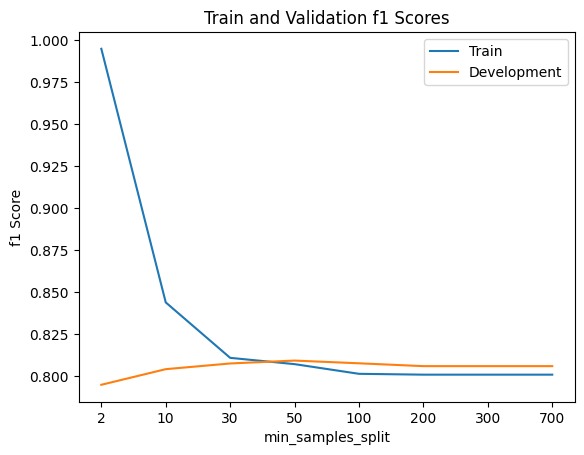

In [25]:
plt.title('Train and Validation f1 Scores')
plt.xlabel('min_samples_split')
plt.ylabel('f1 Score')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_dev)
plt.legend(['Train','Development']);

In [26]:
best_ind = np.argmax(f1_list_dev)
best_min_samples_split = min_samples_split_list[best_ind]

print("Parameter with best performance is: ",best_min_samples_split)

Parameter with best performance is:  50


The model performed best around when the parameter is 50

In [27]:
min_samples_split_list = np.arange(45, 55)

In [28]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_dev = []
f1_list_dev = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_dev = model.predict(X_dev)
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_dev = accuracy_score(predictions_dev,y_dev)
    f1_dev = f1_score(predictions_dev,y_dev)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_dev.append(accuracy_dev)
    f1_list_dev.append(f1_dev)

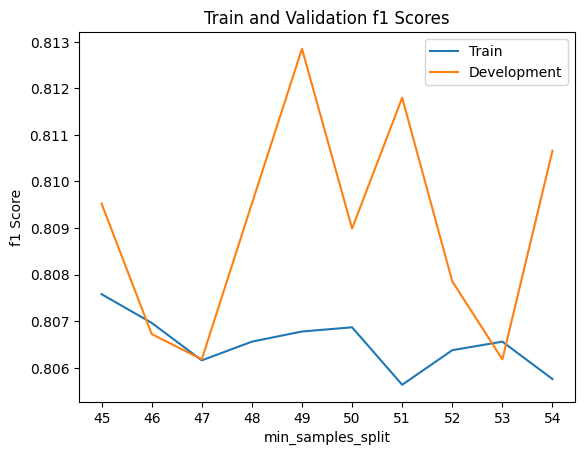

In [29]:
plt.title('Train and Validation f1 Scores')
plt.xlabel('min_samples_split')
plt.ylabel('f1 Score')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_dev)
plt.legend(['Train','Development']);

In [30]:
best_ind = np.argmax(f1_list_dev)
best_min_samples_split = min_samples_split_list[best_ind]

print("Parameter with best performance is:",best_min_samples_split)

Parameter with best performance is: 49


> The model performed best when the parameter is 49. We are going with 49 for `min_samples_split`

#### Choosing `max_depth` Hyperparameter Value

In [82]:
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

In [83]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_dev = []
f1_list_dev = []

for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth=max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_dev = model.predict(X_dev)
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_dev = accuracy_score(predictions_dev,y_dev)
    f1_dev = f1_score(predictions_dev,y_dev)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_dev.append(accuracy_dev)
    f1_list_dev.append(f1_dev)

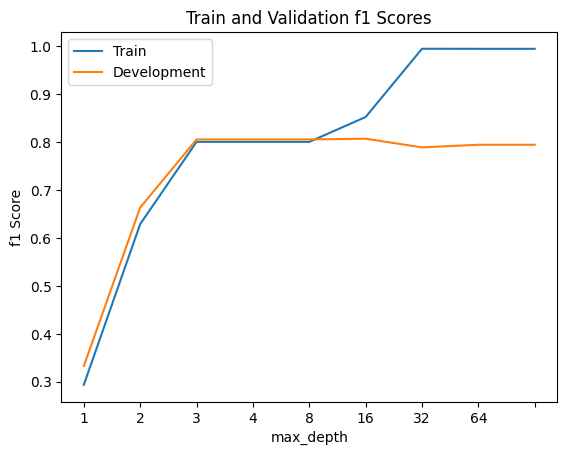

In [84]:
plt.title('Train and Validation f1 Scores')
plt.xlabel('max_depth')
plt.ylabel('f1 Score')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_dev)
plt.legend(['Train','Development']);

In [85]:
best_ind = np.argmax(f1_list_dev)
best_max_depth = max_depth_list[best_ind]

print("Parameter with best performance is:",best_max_depth)

Parameter with best performance is: 16


In [31]:
max_depth_list = np.arange(10, 25)

In [32]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_dev = []
f1_list_dev = []

for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth=max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_dev = model.predict(X_dev)
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_dev = accuracy_score(predictions_dev,y_dev)
    f1_dev = f1_score(predictions_dev,y_dev)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_dev.append(accuracy_dev)
    f1_list_dev.append(f1_dev)

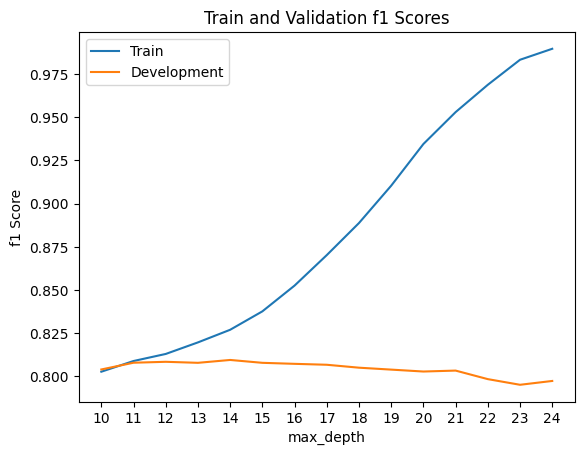

In [33]:
plt.title('Train and Validation f1 Scores')
plt.xlabel('max_depth')
plt.ylabel('f1 Score')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_dev)
plt.legend(['Train','Development']);

In [34]:
best_ind = np.argmax(f1_list_dev)
best_max_depth = max_depth_list[best_ind]

print("Parameter with best performance is:",best_max_depth)

Parameter with best performance is: 14


> The model performed best when the parameter is 14. We are going with 14 for `max_depth`

#### Choosing `n_estimators` Hyperparameter Value

In [90]:
n_estimators_list = [10,50,100,500,1000,2000]

In [91]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_dev = []
f1_list_dev = []

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_dev = model.predict(X_dev)
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_dev = accuracy_score(predictions_dev,y_dev)
    f1_dev = f1_score(predictions_dev,y_dev)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_dev.append(accuracy_dev)
    f1_list_dev.append(f1_dev)

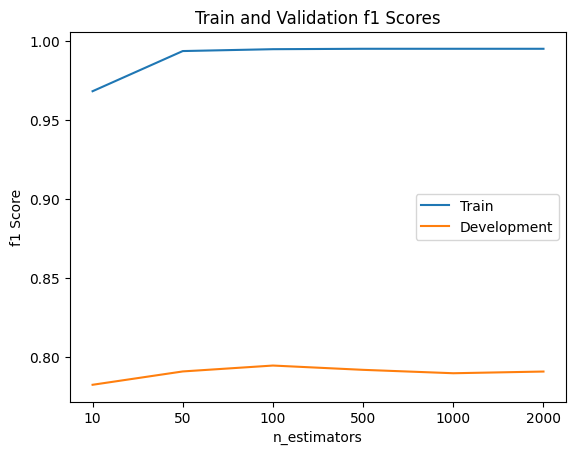

In [92]:
plt.title('Train and Validation f1 Scores')
plt.xlabel('n_estimators')
plt.ylabel('f1 Score')
plt.xticks(ticks = range(len(n_estimators_list)),labels=n_estimators_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_dev)
plt.legend(['Train','Development']);

In [93]:
best_ind = np.argmax(f1_list_dev)
best_n_estimators = n_estimators_list[best_ind]

print("Parameter with best performance is:",best_n_estimators)

Parameter with best performance is: 100


The model performed best around when the parameter is 100

In [94]:
n_estimators_list = np.arange(50,160,10)

In [95]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_dev = []
f1_list_dev = []

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_dev = model.predict(X_dev)
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_dev = accuracy_score(predictions_dev,y_dev)
    f1_dev = f1_score(predictions_dev,y_dev)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_dev.append(accuracy_dev)
    f1_list_dev.append(f1_dev)

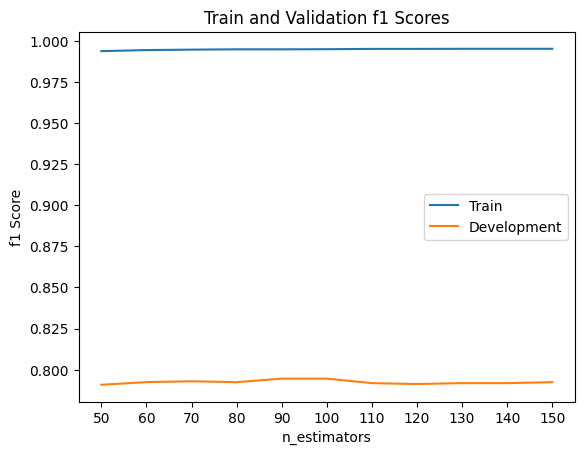

In [96]:
plt.title('Train and Validation f1 Scores')
plt.xlabel('n_estimators')
plt.ylabel('f1 Score')
plt.xticks(ticks = range(len(n_estimators_list)),labels=n_estimators_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_dev)
plt.legend(['Train','Development']);

In [97]:
best_ind = np.argmax(f1_list_dev)
best_n_estimators = n_estimators_list[best_ind]

print("Parameter with best performance is:",best_n_estimators)

Parameter with best performance is: 90


The model performed best around when the parameter is 90

In [35]:
n_estimators_list = np.arange(80,101)

In [36]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_dev = []
f1_list_dev = []

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_dev = model.predict(X_dev)
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_dev = accuracy_score(predictions_dev,y_dev)
    f1_dev = f1_score(predictions_dev,y_dev)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_dev.append(accuracy_dev)
    f1_list_dev.append(f1_dev)

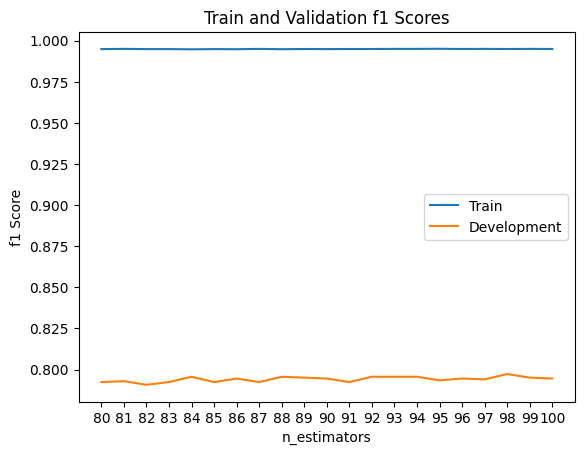

In [37]:
plt.title('Train and Validation f1 Scores')
plt.xlabel('n_estimators')
plt.ylabel('f1 Score')
plt.xticks(ticks = range(len(n_estimators_list)),labels=n_estimators_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_dev)
plt.legend(['Train','Development']);

In [38]:
best_ind = np.argmax(f1_list_dev)
best_n_estimators = n_estimators_list[best_ind]

print("Parameter with best performance is:",best_n_estimators)

Parameter with best performance is: 98


> The model performed best when the parameter is 98. We are going with 98 for `n_estimators`

### Cross Validation

We have a total of 96,112 datasets, we would carry out cross validation to make sure we immerse the 80% of our dataset into model training and 20% into test. For this we would use a kfold of 5.

In [39]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=123)

In [40]:
print(f'Shape of X_train_val {X_train_val.shape}    Shape of y_train_val {y_train_val.shape}')
print(f'Shape of X_test      {X_test.shape}    Shape of y_test      {y_test.shape}')

Shape of X_train_val (76889, 8)    Shape of y_train_val (76889,)
Shape of X_test      (19223, 8)    Shape of y_test      (19223,)


#### Cross Validation using F1 score as evaluation metrics

In [41]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

In [42]:
random_forest_model = RandomForestClassifier(n_estimators = best_n_estimators,
                                             max_depth = best_max_depth, 
                                             min_samples_split = best_min_samples_split,
                                             random_state=123)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scorer = make_scorer(f1_score, average="binary")
cross_val_result_arr = cross_val_score(model, X_train_val, y_train_val, cv=kf, scoring=f1_scorer)

In [43]:
# Printing the results
print("Cross-Validation Results:", cross_val_result_arr)
print(f"Mean F1 score: {cross_val_result_arr.mean():.4f}")
print(f"Standard deviation of F1 score: {cross_val_result_arr.std():.4f}")

Cross-Validation Results: [0.81262983 0.79177378 0.786536   0.8057554  0.7943686 ]
Mean F1 score: 0.7982
Standard deviation of F1 score: 0.0096


### Model Building

In [48]:
## Evaluating on test dataset
random_forest_model = RandomForestClassifier(n_estimators = best_n_estimators,
                                             max_depth = best_max_depth, 
                                             min_samples_split = best_min_samples_split,
                                             random_state=123)

random_forest_model.fit(X_train_val, y_train_val)

y_pred = model.predict(X_test)

f1_test_score = f1_score(y_test, y_pred, average='binary')

print(f"F1 Score on Test Set: {f1_test_score:.4f}")

F1 Score on Test Set: 0.7999


### Confusion Matrix

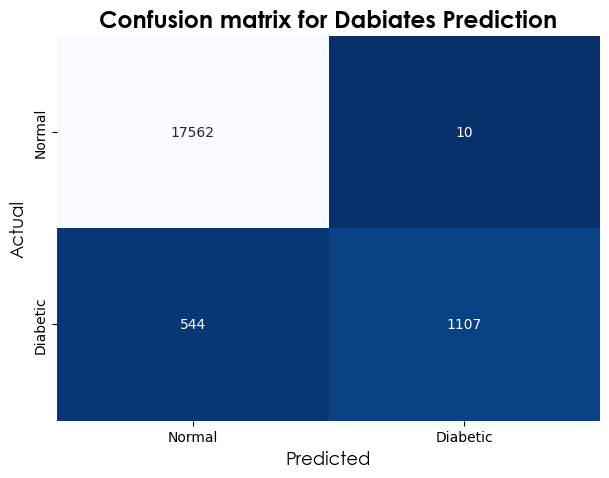

In [50]:
color  = ['#3355FF','#00FF00','#0D004D','#00bfff','#ffcc99','#006600']
# sns.countplot(x='Purchased', data = insurance, palette = color[2:4]);


def ConfusionMatrix(ytest, ypred, label: [str, str] = ["Negative", "Positive"]):
    "A beautiful confusion matrix function to check the model performance"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'Blues_r')
    plt.xlabel('Predicted',font = 'Century Gothic', fontsize = 13)
    plt.ylabel('Actual', font = 'Century Gothic', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.title('Confusion matrix for Dabiates Prediction', font = "Century Gothic", fontsize = 17,fontweight = 'bold');


ConfusionMatrix(y_test, y_pred, label = ["Normal", "Diabetic"])

### Feature Engineering

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import PolynomialFeatures

In [29]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree, include_bias=False),
                         RandomForestClassifier(
                                                 n_estimators = 8,
                                                 max_depth = 14, 
                                                 min_samples_split = 31,
                                                 random_state=123
                                               )
                        )

In [30]:
X_train_dev = pd.concat([X_train,X_dev])

In [31]:
y_train_dev = pd.concat([y_train,y_dev])

In [32]:
degree = np.arange(1,6)

In [33]:
train_score, val_score = validation_curve(PolynomialRegression(max_iter=100000),
                                          X_train_dev,y_train_dev,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,cv=5)

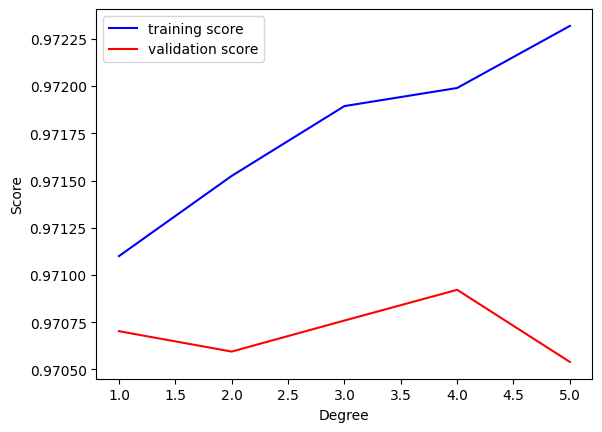

In [34]:
plt.plot(degree,np.median(train_score,1),'b',label='training score')
plt.plot(degree,np.median(val_score,1),'r',label='validation score')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.legend();

> Having polynomial features does not increase the performance significantly